In [80]:
import pandas as pa

In [81]:
df = pa.read_csv("C:\\Users\\keert\\Downloads\\un-general-debates-blueprint.csv")

## **Let’s start with an overview:**

In [82]:
df.head()

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


# **Column Names of the DataFrame**

In [83]:
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')

# **DataFrame Overview**

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.7+ KB


# **Summary Statistics**

In [85]:
df.describe()

,session,year
count,7507.000000,7507.000000
mean,49.610763,1994.610763
std,12.892155,12.892155
min,25.000000,1970.000000
25%,39.000000,1984.000000
50%,51.000000,1996.000000
75%,61.000000,2006.000000
max,70.000000,2015.000000


# **Column Data Types**

In [86]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
dtype: object

## **Stats about text fields**

In [87]:
df.describe(include='O')

,country,country_name,speaker,position,text
count,7507,7507,7480,4502,7507
unique,199,199,5428,113,7507
top,ALB,Albania,Seyoum Mesfin,Minister for Foreign Affairs,33: May I first convey to our President the co...
freq,46,46,12,1813,1


## **Check for missing data**

In [88]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
dtype: int64

## Let us fill the missing data

In [116]:
df['speaker'].fillna('unknown', inplace=True)

In [117]:
df['position'].fillna('unknown', inplace=True)

In [91]:
df.isna().sum()

session         0
year            0
country         0
country_name    0
speaker         0
position        0
text            0
dtype: int64

## Now uppercase (or lowercase) alltext

In [92]:
df[df['speaker'].str.contains('BUSH')]

,session,year,country,country_name,speaker,position,text
2876,45,1990,USA,United States,GEORGE BUSH,unknown,﻿\nIt is really a great privilege to greet you...
3207,47,1992,USA,United States,Mr. George BUSH,President,"Forty-seven years ago I was a young man of 21,..."


In [93]:
df[df['speaker'].str.contains('PARDO')]

,session,year,country,country_name,speaker,position,text
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,unknown,177.\t : It is a fortunate coincidence that pr...
72,26,1971,ARG,Argentina,Mr. DE PABLO PARDO,unknown,33.\t On behalf of the Argentine Government I ...


In [94]:
df[df['speaker'].str.contains('KIRCHSCHLAEGER')]

,session,year,country,country_name,speaker,position,text
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,unknown,155.\t May I begin by expressing to Ambassado...
74,26,1971,AUT,Austria,Mr. KIRCHSCHLAEGER,unknown,112.\t Mr. President. I am happy to convey to...


In [95]:
df[df['speaker'].str.contains('BUSH')]

,session,year,country,country_name,speaker,position,text
2876,45,1990,USA,United States,GEORGE BUSH,unknown,﻿\nIt is really a great privilege to greet you...
3207,47,1992,USA,United States,Mr. George BUSH,President,"Forty-seven years ago I was a young man of 21,..."


# **Adding Column for Text Length**

In [96]:
df['length'] = df['text'].str.len()

# **Histogram of Text Lengths**

<Axes: ylabel='Frequency'>

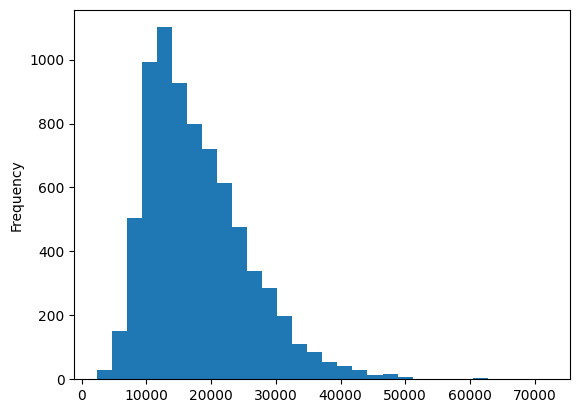

In [97]:
df['length'].plot(kind='hist', bins=30)

# **Boxplot of Text Length by Country**

C:\Users\keert\AppData\Local\Temp\ipykernel_27660\2407676962.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df[where], x="country", y="length", kind='box', height=8, aspect=1.25,


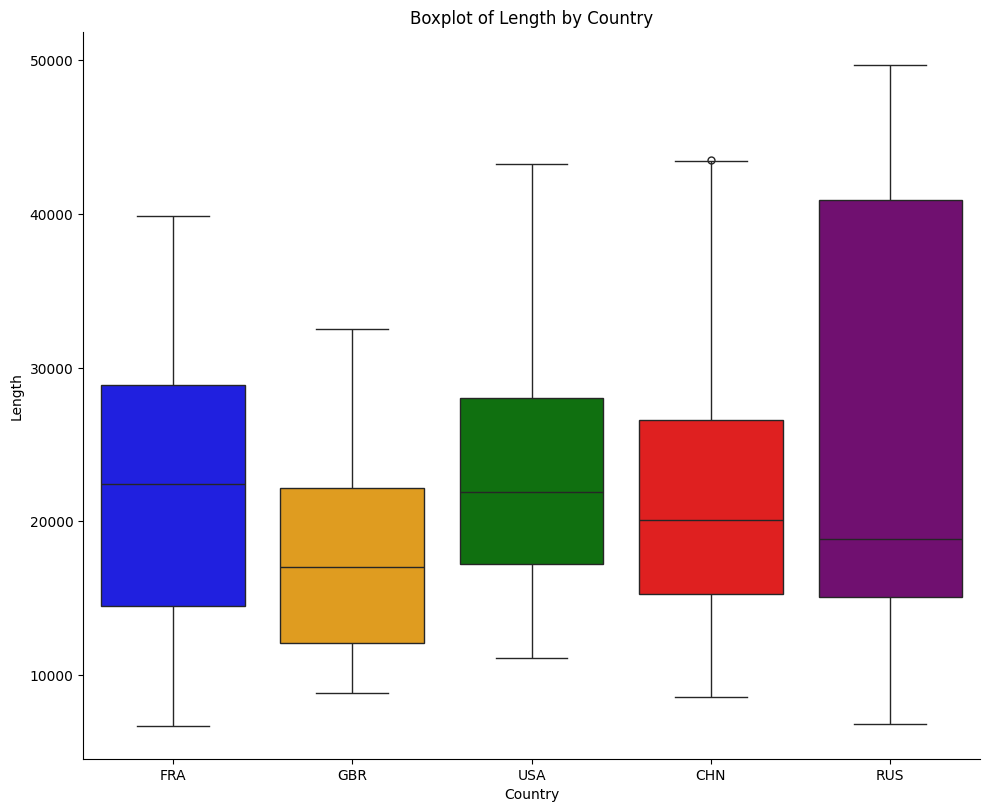

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
country_colors = {'USA': 'blue', 'FRA': 'orange', 'GBR': 'green', 'CHN': 'red', 'RUS': 'purple'}
# Create the seaborn catplot with custom colors
g = sns.catplot(data=df[where], x="country", y="length", kind='box', height=8, aspect=1.25,
                palette=country_colors.values())  # Use custom colors or a palette
g.fig.set_size_inches(10, 8)
plt.xlabel("Country")
plt.ylabel("Length")
plt.title("Boxplot of Length by Country")
# Show the plot
plt.show()


# **Plot of Text Length**

<Axes: >

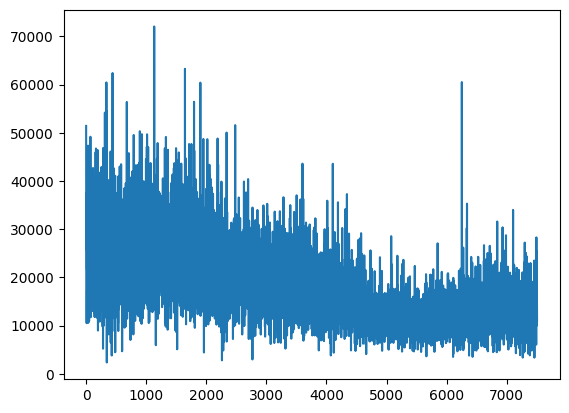

In [99]:
df['length'].plot()

## **Horizontal Boxplot of Text Length**

<Axes: >

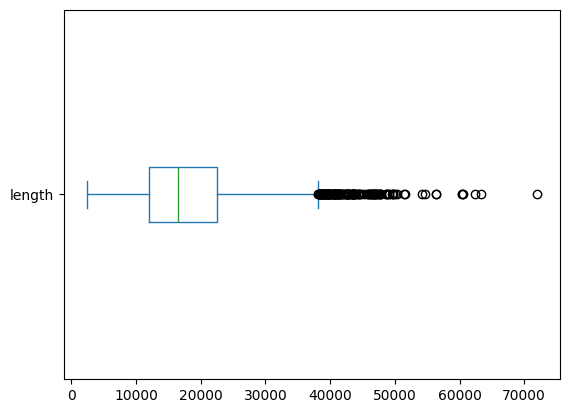

In [100]:
df['length'].plot(kind='box', vert=False)

## **Regex**

## Function to tokenize:

In [101]:
import regex as re  # Import the regex module

def tokenize(text):
    return re.findall(r'[\w-]*[a-zA-Z][\w-]*', text)  # Use re.findall to tokenize based on alphanumeric characters and hyphens

testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
testtokens = tokenize(testtext)
print(testtokens)


['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in', 'www', 'cdc', 'gov']


## How to Remove stop words

In [102]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'nor', "you've", 'out', 'has', "it's", "should've", 'his', 'yours', 'who', 'and', "hadn't", "you're", 'we', 'most', 'doesn', 'so', 'such', 'the', 'did', 'ain', 'weren', 'will', 'him', 'against', 'very', "that'll", 'doing', 'does', 'these', 'from', "don't", 'over', 'wouldn', 'their', 'll', "doesn't", 'was', "shan't", 'whom', 'under', 'to', 'me', 'how', 'should', 'shouldn', 'by', 'some', "needn't", 'her', "you'd", 'no', "weren't", 'both', 'you', "aren't", "haven't", 'themselves', 'our', 'himself', 'needn', 'an', 'didn', 'ma', 'ours', 'shan', 'itself', "couldn't", 'off', 'up', 's', 'for', 'o', 'd', 'its', 'what', 'there', 'myself', 'is', 'they', 'being', 'not', 'why', 'isn', "wouldn't", 'be', 'or', 'as', 'this', "mightn't", "hasn't", 'it', 'any', 'yourself', 'he', 'she', 'because', 'at', 'haven', "won't", 'further', 'a', "shouldn't", 're', 'while', 'am', 'are', 'only', 'above', 'do', "mustn't", 'about', 'herself', 'until', 'theirs', 'i', 'with', 'on', 'y', 'ourselves', 'between', 'each',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Function to remove stop words**

In [103]:
def remove_stop(tokens, stopwords):
    if not isinstance(tokens, list):
        raise ValueError("Input tokens must be a list")
    return [t for t in tokens if t.lower() not in stopwords]

# Just testing it
testtokens = ["This", "is", "a", "test", "sentence"]
stopwords = ["is", "a"]

cleantokens = remove_stop(testtokens, stopwords)
print(cleantokens)


['This', 'test', 'sentence']


## Let’s make a “pipeline”

In [104]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline, stopwords):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:  # Check if the current function is remove_stop
            tokens = fun(tokens, stopwords)  # Pass stopwords to remove_stop
        else:
            tokens = fun(tokens)
    return tokens

# Example usage:
text = "This is a sample text."
stopwords = ["is", "a"]
processed_text = prepare(text, pipeline, stopwords)
print(processed_text)

['this', 'sample', 'text']


## Run the pipeline

In [105]:
def process_text(text, pipeline, stopwords):
    for func in pipeline:
        if func == remove_stop:
            text = func(text, stopwords)
        else:
            text = func(text)
    return text

# Example usage:
df['tokens'] = df['text'].apply(process_text, pipeline=pipeline, stopwords=stopwords)

## Count the tokens

In [106]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...,10568,"[on, behalf, of, the, people, and, the, govern...",1653
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...,25430,"[seventy, years, have, passed, since, the, est...",4023
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...,13662,"[i, should, like, to, congratulate, the, presi...",2107
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...,14247,"[i, would, like, to, begin, by, thanking, the,...",2141
7506,70,2015,ZWE,Zimbabwe,Robert Mugabe,President,Allow me at the outset to extend to Mr. Mogens...,11013,"[allow, me, at, the, outset, to, extend, to, m...",1703


## **Word frequencyAnalysis**

 **Use the “Counter”**

In [107]:
from collections import Counter
tokens = tokenize("She likes my cats and my cats like my sofa.")
testcount= Counter(tokens)
print(testcount)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


##  **add new data to the currentcount:**

In [108]:
more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens)
print(testcount)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


## Let’s count:

In [109]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('the', 1899342), ('of', 1157244), ('and', 796563), ('to', 734634), ('in', 523189)]


## Now, we put the word frequency in it’s owndataframe for analysis

In [111]:
import pandas as pd
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
# Filter for frequencies >= 1
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
# Sort DataFrame by frequency in descending order
freq_df = freq_df.sort_values('freq', ascending=False)
# Display top 10 tokens by frequency
freq_df.head(10)


,freq
token,
the,1899342
of,1157244
and,796563
to,734634
in,523189
that,314521
for,230185
we,220322
on,164103


## Stats

In [112]:
freq_df.describe()

,freq
count,6.843900e+04
mean,3.033900e+02
std,1.015965e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,1.500000e+01
max,1.899342e+06


## Bar chart

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

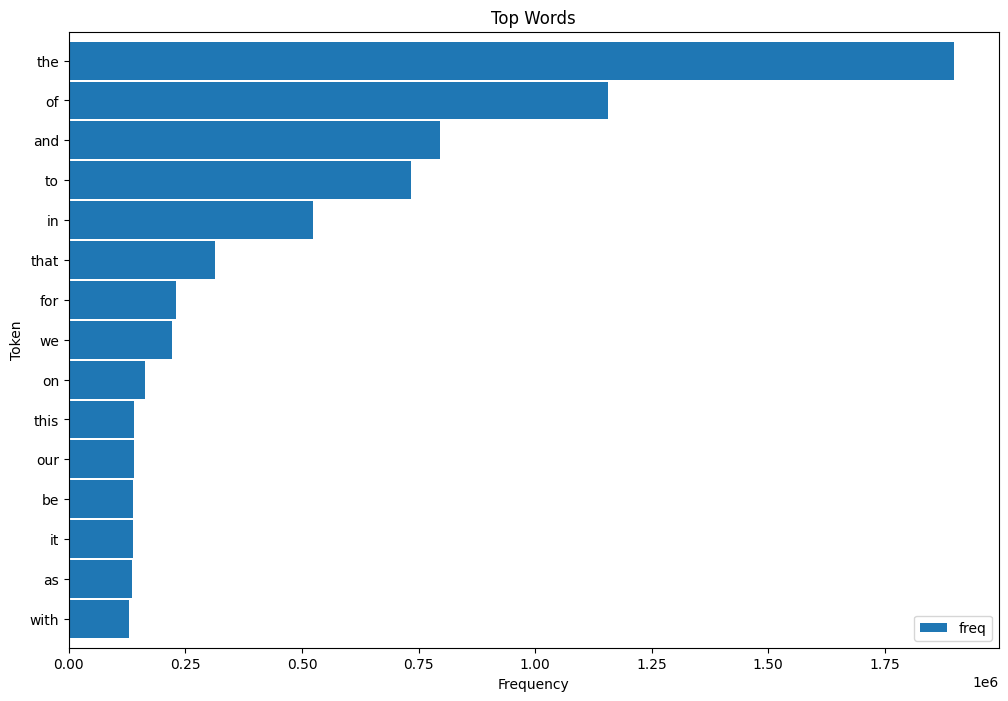

In [113]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

## Word cloud

(-0.5, 399.5, 199.5, -0.5)

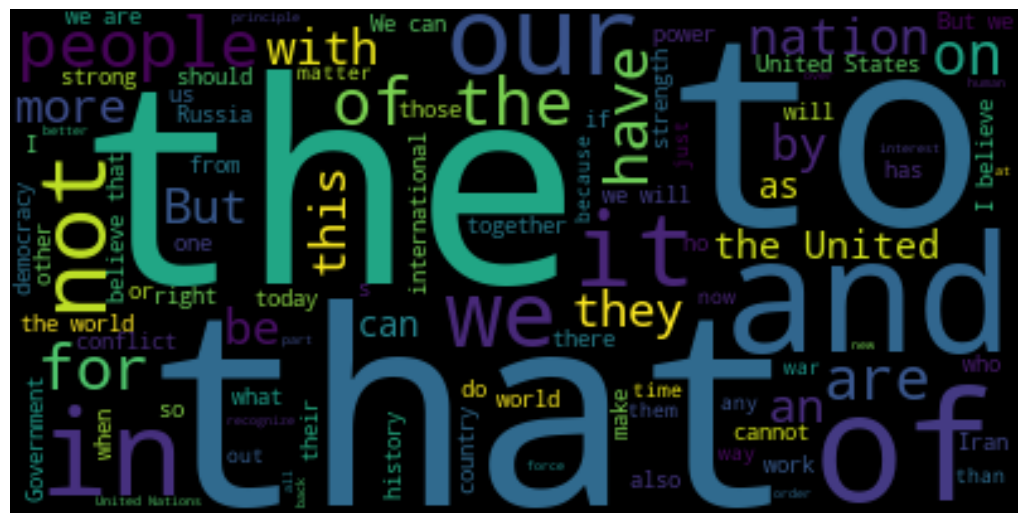

In [114]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
text = df.query("year==2015 and country=='USA'")['text'].values[0]
plt.figure(figsize=(13, 10)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

##  (ALL data) Word Cloud

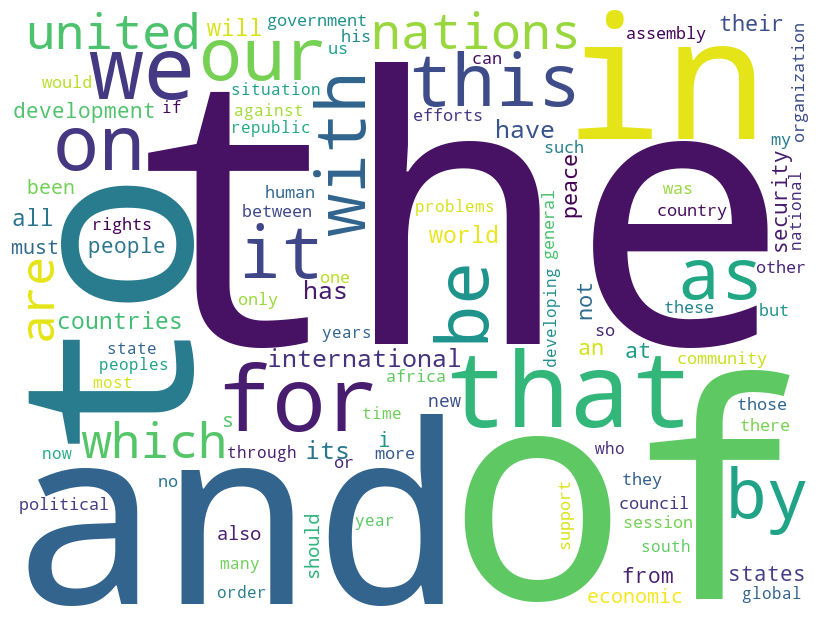

In [115]:
from wordcloud import WordCloud  # Import the WordCloud class
import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib

# Create a WordCloud object with specified parameters
wc = WordCloud(
    background_color='white',  # Set background color to white
    width=800,                 # Set width of the word cloud image
    height=600,                # Set height of the word cloud image
    max_words=100,             # Maximum number of words to include in the word cloud
    margin=2                   # Set margin between words
)

# Generate the word cloud using the frequency dictionary
wc.fit_words(freq_df['freq'].to_dict())

# Create a new figure for the plot with specified size and no specific background color
plt.figure(figsize=(8, 8), facecolor=None)

# Display the word cloud image
plt.imshow(wc)

# Turn off axis labels
plt.axis("off")

# Adjust layout to eliminate extra whitespace
plt.tight_layout(pad=0)

# Show the plot
plt.show()
